In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join("wineData.csv"))
df.head()

,obs_id,title,winery,country,province,variety,description,points,price
0,0,Nicosia 2013 Vulkà Bianco (Etna),Nicosia,Italy,Sicily & Sardinia,White Blend,"Aromas include tropical fruit, broom, brimston...",87,NaN
1,1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,Portugal,Douro,Portuguese Red,"This is ripe and fruity, a wine that is smooth...",87,15.0
2,2,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,US,Oregon,Pinot Gris,"Tart and snappy, the flavors of lime flesh and...",87,14.0
3,3,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,US,Michigan,Riesling,"Pineapple rind, lemon pith and orange blossom ...",87,13.0
4,4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,US,Oregon,Pinot Noir,"Much like the regular bottling from 2012, this...",87,65.0


In [3]:
price_df = df[["points", "price"]]
price_df.head()

,points,price
0,87,NaN
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0


In [4]:
price_df = price_df[~price_df.isin(['NaN']).any(axis=1)]
price_df.count()

points    120975
price     120975
dtype: int64

In [5]:
X = price_df.points.values.reshape(-1, 1)
y = price_df.price.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (120975, 1) (120975, 1)


array([[87],
       [87],
       [87],
       ...,
       [90],
       [90],
       [90]])

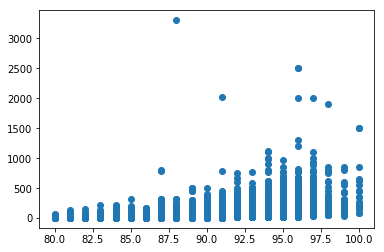

In [6]:
plt.scatter(X, y)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[5.6075014]]
y-axis intercept:  [-460.46243009]


In [10]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[80]]
Max X Value: [[100]]


In [11]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

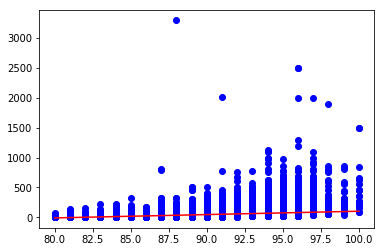

In [12]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

### For every point in the score there is a $5.60 in the price.